# GetBiologicalData

Gets required additional biological data from BioCyc for Arabidopsis thaliana

Assumes BioCyc pathway-tools is running locally and appropriate PGDB has been imported

Within a command line window type `./pathway-tools -lisp -python-local-only`

Uses the pythoncyc package to access pathway-tools

For more details see the respository README

Import pythoncyc

In [1]:
import pythoncyc

Import other required packages

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Connect to pathway-tools and specify species

Specify `ara` to access imported Aribidopsis PGDB

In [3]:
ara = pythoncyc.select_organism('ara')

Load metabolite time-series data file

In [4]:
arr_data_pd = pd.read_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master.csv")

Check the imported CSV file

In [5]:
arr_data_pd.head(5)

,BioCyC Name,Metabolite,0.5,1,2,4,12,24,48,72
0,PYRUVATE,Pyruvate,1.19,1.32,0.86,0.68,0.54,1.84,3.23,3.63
1,LACTATE,Lactate,0.87,1.26,0.98,0.67,0.53,4.94,3.67,12.75
2,ETHANOL-AMINE,Ethanolamine,1.31,1.45,1.18,1.22,0.52,0.59,0.31,0.26
3,GLYCEROL,Glycerol,1.61,0.72,0.68,1.91,1.42,3.30,0.90,1.40
4,SUC,Succinate,0.75,1.08,0.80,0.55,0.39,0.21,0.87,1.62


The BioCyC column contains the names that need to be used with BioCyC

The Metabolite column contains the the names used in the original time-series dataset

Extract first column of BioCyC metabolite names

In [9]:
compounds = arr_data_pd["BioCyC Name"].tolist() # Will use this later ...
#print(compounds)

Data on pathways extracted via API from BioCyc (see README for more details)

Create empty numpy array for common pathways.   For every pair of metabolites store the number of common metabolomic pathways   

In [7]:
rows, cols = (len(compounds), len(compounds)) # Its a square dataframe
common_pathways = pd.DataFrame(np.zeros((rows, cols)), dtype = int) # Initialise empty dataframe

Calculate common pathways between every pair of compounds

No data in BioCyc for lactate, glucose and folates so create exceptions to set number of common paths to zero

Output is a square dataframe that allows you to access the number of common pathways between any pair of metabolites

Uses sets so easier to find intersection (common paths)

In [8]:
exceptions = {'LACTATE', 'GLUCOSE', 'FOLATES'} # No data in BioCyC
for row in range(0, rows): # Loop through all rows (metabolites)
    for column in range(0, cols): # Loop through all columns (metabolites
        if (row == column): # Exception to not compare a metabolite with itself
            common_pathways[row][column] = 0
            continue
        if compounds[column] in exceptions: # Handle exceptions by continuing to next iteration
            common_pathways[row][column] = 0
            continue
        if compounds[row] in exceptions: # Handle exceptions by continuing to next iteration
            common_pathways[row][column] = 0
            continue
        row_paths = set(ara.pathways_of_compound(compounds[row])) # Get pathways for row metabolite
        col_paths = set(ara.pathways_of_compound(compounds[column])) # Get pathways for metabolite
        common_paths = row_paths.intersection(col_paths) # Use a set intersection to get common subset
        common_pathways[row][column] = len(common_paths) # Store the number of common pathways
common_pathways.head(5) # View common_pathways dataframe

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,5,1,2,0,4,2,...,6,4,0,2,4,3,1,3,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,6,1,5,3,...,0,0,0,0,0,0,0,1,0,0


Note - it is a relatively sparse array, hopefully that has some biological relevance?

Add metabolite names as column and row identifiers (this is good for readability, but with hindsight only made accessing individual values a bit more complex)

In [10]:
common_pathways.set_axis(compounds, axis=1, inplace=True)
common_pathways.set_axis([compounds], axis=0, inplace=True)
common_pathways.head(5)

,PYRUVATE,LACTATE,ETHANOL-AMINE,GLYCEROL,SUC,GLYCERATE,FUM,CADAVERINE,MAL,4-AMINO-BUTYRATE,...,GLN,THR,PRO,VAL,TRP,ILE,LEU,PHE,FORMATE,FOLATES
PYRUVATE,0,0,0,0,5,1,2,0,4,2,...,6,4,0,2,4,3,1,3,2,0
LACTATE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETHANOL-AMINE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GLYCEROL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SUC,5,0,0,0,0,0,6,1,5,3,...,0,0,0,0,0,0,0,1,0,0


Write common pathways to a file as we will use this in later data analysis

In [11]:
common_pathways.to_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-Common-Pathways.csv", sep=",")

Plot distribution of number of common pathways

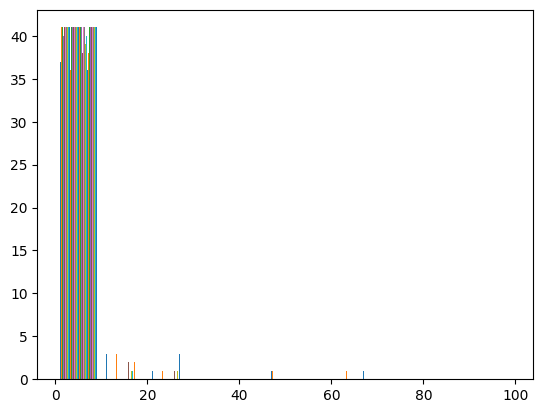

In [189]:
plt.hist(common_pathways, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()

Note - most common pathways are < 10 with a small number of higher values>